# Lasso Regression

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [50]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Zadanie 
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

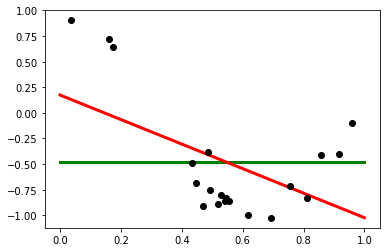

In [51]:
clf = Lasso(alpha=1, normalize=True)
clf.fit(x, y) 

clf1 = Lasso(alpha=0.1, normalize=True)
clf1.fit(x, y) 

clf2 = Lasso(alpha=0.01, normalize=True)
clf2.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x_plot, clf1.predict(x_plot), color='g',linewidth=3)
plt.plot(x_plot, clf2.predict(x_plot), color='r',linewidth=3)


plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


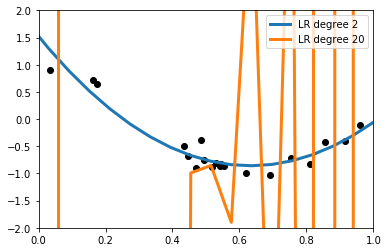

In [52]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 100))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 100))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Ridge Regression) dla wielomianów o stopniu **20**
* regresję (Lasso Regression) dla wielomianów o stopniu **20**



LR degree 2
RidgeR degree 20
LassoR degree 20 0.01


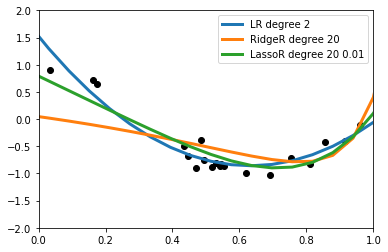

In [53]:

# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('RidgeR degree 20', make_pipeline(PolynomialFeatures(20), Ridge()) ))
models.append(('LassoR degree 20 0.01', make_pipeline(PolynomialFeatures(20), Lasso(alpha=0.01)) ))


x_plot = np.vstack(np.linspace(-3, 3, 100))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 100))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2 
- regrsji wielomianowej stopnia 5 
- regrsji wielomianowej stopnia 25  
- regrsji Lasso wielomianowej stopnia 2 alpha=10.0
- regrsji Lasso wielomianowej stopnia 5 alpha=10.0
- regrsji Lasso wielomianowej stopnia 25 alpha=10.0 

oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

In [54]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))

models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
# models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))

models.append(('Lasso 2', make_pipeline(PolynomialFeatures(2), Lasso(alpha=0.1)) ))
models.append(('Lasso 5', make_pipeline(PolynomialFeatures(5), Lasso(alpha=0.01)) ))
models.append(('Lasso 25', make_pipeline(PolynomialFeatures(20), Lasso(alpha=0.001)) ))

# evaluate each model in turn
results = []
names = []

In [55]:
seed=123
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

In [56]:
for name, model in models:
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  MEAN: %f STD: (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR  MEAN: -0.539096 STD: (0.360599)
PR2  MEAN: -0.172546 STD: (0.114580)
PR5  MEAN: -0.183263 STD: (0.172824)
Lasso 2  MEAN: -0.477342 STD: (0.344141)
Lasso 5  MEAN: -0.268160 STD: (0.199767)
Lasso 25  MEAN: -0.170634 STD: (0.128539)


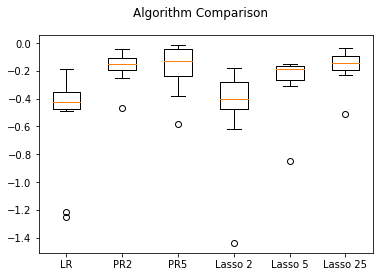

In [57]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [58]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7],
                    'lasso__alpha': [0.1, 1, 2, 3, 0.001]},
                    cv=5,
                    refit=False)
grid.fit(x, y)
grid.best_params_

{'lasso__alpha': 0.001, 'polynomialfeatures__degree': 3}

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [59]:
import pandas as pd
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [61]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(max_iter=1e5)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7],
                    'lasso__alpha': [0.01,0.1, 1, 2, 3]},
                    cv=5,
                    refit=False)
grid.fit(X, y)
grid.best_params_

{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 4}